In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from __future__ import division
import sys
import nltk
import sklearn
%matplotlib inline
np.random.seed(18) 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import re
import spacy
import unicodedata
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import collections
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,mean_absolute_error,mean_absolute_error,r2_score,log_loss
from sklearn.tree import DecisionTreeRegressor

In [ ]:
 from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
 from sklearn.tree import DecisionTreeClassifier

In [ ]:
 #library to import files
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Tidy_data.csv")

In [ ]:
data = data.set_index('Unnamed: 0')
data = data.rename(index={'Unnamed: 0':'Id'})

In [ ]:
new_data=pd.merge(data[(data['Q_Score']>5)] ,data[(data['A_Score']>=5)],how="inner")

In [ ]:
new_data.shape

(19475, 8)

Cleaning Data


Text(0.5, 1.0, 'Ratio of missing values per columns')

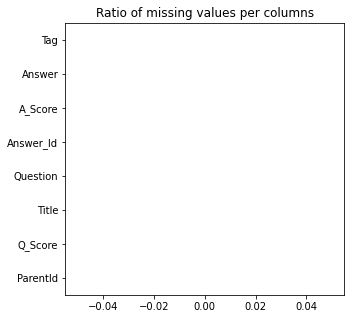

In [ ]:
plt.figure(figsize=(5, 5))
new_data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [ ]:
print('Dupplicate entries: {}'.format(new_data.duplicated().sum()))
new_data.drop_duplicates(inplace = True)

Dupplicate entries: 0


In [ ]:
new_data['Tag'] = new_data['Tag'].apply(lambda x: x.split())

In [ ]:
new_data

,ParentId,Q_Score,Title,Question,Answer_Id,A_Score,Answer,Tag
0,3567180,29,Increment Letters like numbers,I would like to write a function that takes in...,3567218,65,Character/string increment works in PHP (thoug...,[php]
1,1692500,11,Get height/width of image in Javascript (ideal...,"Sorry if this has already been answered, but I...",1692507,15,"If the image is not loaded, it won't have its'...",[javascript]
2,1571340,151,"What is the ""assert"" function?",I've been studying OpenCV tutorials and came a...,1571644,75,The assert computer statement is analogous to ...,"[c++,c,assert]"
3,1571340,151,"What is the ""assert"" function?",I've been studying OpenCV tutorials and came a...,1571360,178,assert will terminate the program (usually wit...,"[c++,c,assert]"
4,791390,36,More Elegant Exception Handling Than Multiple ...,"Using C#, is there a better way to handle mult...",791401,9,"Unfortunately, C# does not have user exception...","[c#,.net,exception,error-handling]"
...,...,...,...,...,...,...,...,...
19470,3042220,9,How do I calculate the size of an entity store...,Is there an easy way to calculate the size of ...,3042250,13,App engine stores each entity as a protobuf. ...,[google-app-engine]
19471,1300890,12,MD5 hash with salt for keeping password in DB ...,Could you please advise me some easy algorithm...,1300927,34,You can use the HMACMD5 class:\nvar hmacMD5 = ...,"[c#,.net,security,hash,md5]"
19472,3047010,64,Best Redis library for Java,The official Redis homepage lists JDBC-Redis a...,3838731,9,Both Jedis and JRedis are being actively devel...,"[java,redis]"
19473,3047010,64,Best Redis library for Java,The official Redis homepage lists JDBC-Redis a...,4082125,6,An easier solution is to not worry about worki...,"[java,redis]"


In [ ]:
all_tags = [item for sublist in new_data['Tag'].values for item in sublist]

In [ ]:
len(all_tags)

19475

In [ ]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

9656

In [ ]:
flat_list = [item for sublist in new_data['Tag'].values for item in sublist]
keywords = nltk.FreqDist(flat_list)
keywords = nltk.FreqDist(keywords)
frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [ ]:
len(keywords)

9656

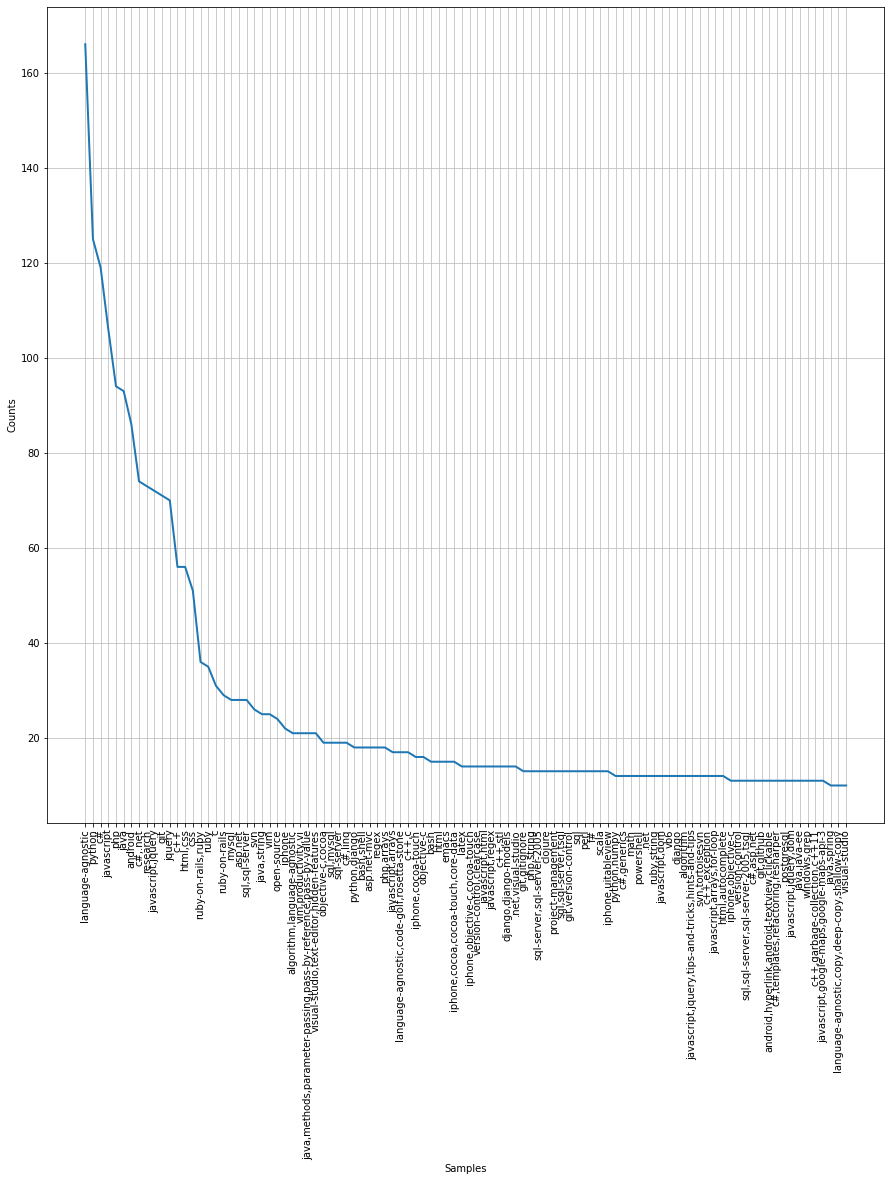

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
keywords.plot(100, cumulative=False)
fig.savefig("/content/drive/MyDrive/tag_distribution.jpg",bbox_inches='tight')

In [ ]:
def most_common(tags):
  '''
  checking if tags in an entry is in the most common tags .
  '''
  tags_filtered = []
  for i in range(0, len(tags)):
      if tags[i] in tags_features:
          tags_filtered.append(tags[i])
  return tags_filtered

In [ ]:
new_data['Tag'] = new_data['Tag'].apply(lambda x: most_common(x))
new_data['Tag'] = new_data['Tag'].apply(lambda x: x if len(x)>0 else None)

In [ ]:
new_data.shape

(19475, 8)

In [ ]:
new_data

,ParentId,Q_Score,Title,Question,Answer_Id,A_Score,Answer,Tag
0,3567180,29,Increment Letters like numbers,I would like to write a function that takes in...,3567218,65,Character/string increment works in PHP (thoug...,[php]
1,1692500,11,Get height/width of image in Javascript (ideal...,"Sorry if this has already been answered, but I...",1692507,15,"If the image is not loaded, it won't have its'...",[javascript]
2,1571340,151,"What is the ""assert"" function?",I've been studying OpenCV tutorials and came a...,1571644,75,The assert computer statement is analogous to ...,None
3,1571340,151,"What is the ""assert"" function?",I've been studying OpenCV tutorials and came a...,1571360,178,assert will terminate the program (usually wit...,None
4,791390,36,More Elegant Exception Handling Than Multiple ...,"Using C#, is there a better way to handle mult...",791401,9,"Unfortunately, C# does not have user exception...",None
...,...,...,...,...,...,...,...,...
19470,3042220,9,How do I calculate the size of an entity store...,Is there an easy way to calculate the size of ...,3042250,13,App engine stores each entity as a protobuf. ...,None
19471,1300890,12,MD5 hash with salt for keeping password in DB ...,Could you please advise me some easy algorithm...,1300927,34,You can use the HMACMD5 class:\nvar hmacMD5 = ...,None
19472,3047010,64,Best Redis library for Java,The official Redis homepage lists JDBC-Redis a...,3838731,9,Both Jedis and JRedis are being actively devel...,None
19473,3047010,64,Best Redis library for Java,The official Redis homepage lists JDBC-Redis a...,4082125,6,An easier solution is to not worry about worki...,None


In [ ]:
new_data.dropna(subset=['Tag'], inplace=True)

In [ ]:
new_data.shape

(2663, 8)

In [ ]:
new_data.head()

,ParentId,Q_Score,Title,Question,Answer_Id,A_Score,Answer,Tag
0,3567180,29,Increment Letters like numbers,I would like to write a function that takes in...,3567218,65,Character/string increment works in PHP (thoug...,[php]
1,1692500,11,Get height/width of image in Javascript (ideal...,"Sorry if this has already been answered, but I...",1692507,15,"If the image is not loaded, it won't have its'...",[javascript]
45,2325370,8,C# Increase Heap Size - Is It Possible,I have an out of memory exception using C# whe...,2325402,5,"No, this is not possible. This problem might o...",[c#]
56,3859170,13,How to use jQuery to prevent the space key fro...,I thought it would be a simple thing to hijack...,3859230,18,The problem is that return 109 doesn't do what...,"[javascript,jquery]"
57,3859170,13,How to use jQuery to prevent the space key fro...,I thought it would be a simple thing to hijack...,3859190,10,"You usually want the keyup event instead here,...","[javascript,jquery]"


Preprocessing Body



In [ ]:
def clean_text(text):
  '''
  removing escape characters and special characters
  '''
  text = text.lower()
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", " ", text)
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "can not ", text)
  text = re.sub(r"won't", "will not ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"\'scuse", " excuse ", text)
  text = re.sub(r"\'\n", " ", text)
  text = re.sub(r"\'\xa0", " ", text)
  text = re.sub('\s+', ' ', text)
  text = text.strip(' ')
  return text

In [ ]:
new_data['Title'] = new_data['Title'].apply(lambda x: clean_text(x)) 

In [ ]:
new_data['Question'] = new_data['Question'].apply(lambda x: clean_text(x)) 

In [ ]:
new_data['Answer'] = new_data['Answer'].apply(lambda x: clean_text(x)) 

In [ ]:
new_data.head()

,ParentId,Q_Score,Title,Question,Answer_Id,A_Score,Answer,Tag
0,3567180,29,increment letters like numbers,i would like to write a function that takes in...,3567218,65,character/string increment works in php (thoug...,[php]
1,1692500,11,get height/width of image in javascript (ideal...,"sorry if this has already been answered, but i...",1692507,15,"if the image is not loaded, it will not have i...",[javascript]
45,2325370,8,c# increase heap size - is it possible,i have an out of memory exception using c# whe...,2325402,5,"no, this is not possible. this problem might o...",[c#]
56,3859170,13,how to use jquery to prevent the space key fro...,i thought it would be a simple thing to hijack...,3859230,18,the problem is that return 109 does not do wha...,"[javascript,jquery]"
57,3859170,13,how to use jquery to prevent the space key fro...,i thought it would be a simple thing to hijack...,3859190,10,"you usually want the keyup event instead here,...","[javascript,jquery]"


In [ ]:
new_data['Answer']

0        character/string increment works in php (thoug...
1        if the image is not loaded, it will not have i...
45       no, this is not possible. this problem might o...
56       the problem is that return 109 does not do wha...
57       you usually want the keyup event instead here,...
                               ...                        
19433    based on sfeley answer, here is an updated/fix...
19462    use dateformat to solve this problem: dateform...
19463    i did as follows and it worked: (current date ...
19466    document.getelementbyid("in1").setattribute("n...
19467    try this: document.getelementbyid("in1").setat...
Name: Answer, Length: 2663, dtype: object

In [ ]:
token=ToktokTokenizer()

In [ ]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [ ]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [ ]:
re.escape(punct)

'!"\\#\\$%\\&\'\\(\\)\\*\\+,\\./:;<=>\\?@\\[\\\\\\]\\^_`\\{\\|\\}\\~'

In [ ]:
re.compile('[%s]' % re.escape(punct))

re.compile(r'[!"\#\$%\&\'\(\)\*\+,\./:;<=>\?@\[\\\]\^_`\{\|\}\~]', re.UNICODE)

In [ ]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    # remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [ ]:
new_data['Answer'] = new_data['Answer'].apply(lambda x: clean_punct(x)) 
new_data['Question'] = new_data['Question'].apply(lambda x: clean_punct(x)) 
new_data['Title'] = new_data['Title'].apply(lambda x: clean_punct(x)) 

In [ ]:
new_data['Answer'][45]

'no this is not possible this problem might occur because you are running on a 32-bit os and memory is too fragmented try not to load the whole file into memory for instance by processing line by line or when you really need to load it completely by loading it in multiple smaller parts'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [ ]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))


In [ ]:
new_data['Answer'] = new_data['Answer'].apply(lambda x: lemitizeWords(x)) 
new_data['Answer'] = new_data['Answer'].apply(lambda x: stopWordsRemove(x)) 

In [ ]:
new_data['Title'] = new_data['Title'].apply(lambda x: lemitizeWords(x)) 
new_data['Title'] = new_data['Title'].apply(lambda x: stopWordsRemove(x)) 

new_data['Question'] = new_data['Question'].apply(lambda x: lemitizeWords(x)) 
new_data['Question'] = new_data['Question'].apply(lambda x: stopWordsRemove(x)) 

new_data['Tag'] = new_data['Tag'].apply(lambda x: lemitizeWords(x)) 
new_data['Tag'] = new_data['Tag'].apply(lambda x: stopWordsRemove(x)) 

In [ ]:
new_data

,ParentId,Q_Score,Title,Question,Answer_Id,A_Score,Answer,Tag
0,3567180,29,increment letter like number,would like write function take 3 character inc...,3567218,65,characterstring increment work php though decr...,[ ' php ' ]
1,1692500,11,get heightwidth image javascript ideally witho...,sorry already answer find want find height wid...,1692507,15,image load height width set wait image fully l...,[ ' javascript ' ]
45,2325370,8,c# increase heap size - possible,memory exception use c# read massive file need...,2325402,5,possible problem might occur run 32-bit os mem...,[ ' c# ' ]
56,3859170,13,use jquery prevent space key enter space,think would simple thing hijack space key form...,3859230,18,problem return 109 want event handler return t...,"[ ' javascript , jquery ' ]"
57,3859170,13,use jquery prevent space key enter space,think would simple thing hijack space key form...,3859190,10,usually want keyup event instead fire space ad...,"[ ' javascript , jquery ' ]"
...,...,...,...,...,...,...,...,...
19433,1186400,81,set default value rail,try find best way set default value object rai...,10193221,51,base sfeley answer updatedfixed one newer rail...,"[ ' ruby-on-rails , ruby ' ]"
19462,2806360,11,java program get current date without timestamp,need java program get current date without tim...,21929530,8,use dateformat solve problem dateformat datefo...,[ ' java ' ]
19463,2806360,11,java program get current date without timestamp,need java program get current date without tim...,12471430,6,follow work current date without timestamp sim...,[ ' java ' ]
19466,1073350,6,want use javascript insert attribute element,ideas would go write javascript method insert ...,1073365,5,documentgetelementbyid in1 setattribute name s...,"[ ' javascript , html ' ]"


EDA


In [ ]:
no_topics = 20

In [ ]:
text1= new_data['Title']
text2=new_data['Question']
text3=new_data['Answer']

In [ ]:
vectorizer_train = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

Data preparation


In [ ]:
x1= new_data['Title']
x2= new_data['Question']
x3 = new_data['Answer']

In [ ]:
new_data['Title']

0                             increment letter like number
1        get heightwidth image javascript ideally witho...
45                        c# increase heap size - possible
56                use jquery prevent space key enter space
57                use jquery prevent space key enter space
                               ...                        
19433                               set default value rail
19462      java program get current date without timestamp
19463      java program get current date without timestamp
19466         want use javascript insert attribute element
19467         want use javascript insert attribute element
Name: Title, Length: 2663, dtype: object

In [ ]:
y=new_data['Tag']

In [ ]:
y

0                         [ ' php ' ]
1                  [ ' javascript ' ]
45                         [ ' c# ' ]
56        [ ' javascript , jquery ' ]
57        [ ' javascript , jquery ' ]
                     ...             
19433    [ ' ruby-on-rails , ruby ' ]
19462                    [ ' java ' ]
19463                    [ ' java ' ]
19466       [ ' javascript , html ' ]
19467       [ ' javascript , html ' ]
Name: Tag, Length: 2663, dtype: object

In [ ]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [ ]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,strip_accents = None,encoding = 'utf-8', 
                                       preprocessor=None,token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,strip_accents = None,encoding = 'utf-8', 
                                       preprocessor=None,token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X3 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,strip_accents = None,encoding = 'utf-8', 
                                       preprocessor=None,token_pattern=r"(?u)\S\S+",
                                       max_features=1000)


In [ ]:
X1_tfidf = vectorizer_X1.fit_transform(x1)
X2_tfidf = vectorizer_X2.fit_transform(x2)
X3_tfidf = vectorizer_X3.fit_transform(x3)

In [ ]:
X_tfidf = np.hstack([X1_tfidf.A,X2_tfidf.A,X3_tfidf.A])

In [ ]:
#X_tfidf = np.vstack([[X1_tfidf.A],[X2_tfidf.A],[X3_tfidf.A]])

In [ ]:
X_tfidf.shape

(2663, 3000)

In [ ]:
y_bin.shape

(2663, 40)

In [ ]:
multilabel_binarizer.classes_

array([' ', '#', "'", '+', ',', '-', '.', '0', '1', '2', '3', '5', '6',
       '[', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) 

Models :


In [ ]:
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Accuracy : {}".format(accuracy_score(y_pred,y_test)))
    print("Precision: {}".format(precision_score(y_pred,y_test,average="macro")))
    print("Recall value : {}".format(recall_score(y_pred,y_test,average="macro")))
    print("F1 score : {}".format(f1_score(y_pred,y_test,average="macro")))
    print("Log Loss : {}".format(log_loss(y_test,y_pred)))
    print("---")   

In [ ]:
lr = LogisticRegression(penalty="l2",max_iter=500)
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, lr)

Clf:  LogisticRegression
Accuracy : 0.3771106941838649
Precision: 0.5475488680222746
Recall value : 0.8422108518027953
F1 score : 0.6438237427368791
Log Loss : 115.13524328549178
---


In [ ]:
sgd = SGDClassifier(penalty="l2",max_iter=500,alpha=0.0001)
clf = OneVsRestClassifier(sgd)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Regularization parameter: {}, Maximum iterations: {}".format(0.001,500))
print("------------------------------>")
print_score(y_pred, sgd)

Regularization parameter: 0.001, Maximum iterations: 500
------------------------------>
Clf:  SGDClassifier
Accuracy : 0.5572232645403377
Precision: 0.8426260895661803
Recall value : 0.9860207786609066
F1 score : 0.9046388266190821
Log Loss : 76.7700883310421
---


In [ ]:
sgd = SGDClassifier(penalty="l2",max_iter=550,alpha=0.01)
clf = OneVsRestClassifier(sgd)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, sgd)

Clf:  SGDClassifier
Accuracy : 0.13133208255159476
Precision: 0.22966997051417043
Recall value : 0.7247685185185185
F1 score : 0.30191154817399757
Log Loss : 228.4845635949675
---


Random Forest


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Cross validation score:",cross_val_score(rfc, X_train, y_train, cv=5).mean())
print_score(y_pred, rfc)

Cross validation score: 0.616431924882629
Clf:  RandomForestClassifier
Accuracy : 0.6472795497185742
Precision: 0.792652834074129
Recall value : 0.9895068093028607
F1 score : 0.8685730291231242
Log Loss : 78.55581970874812
---


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Cross validation score:",cross_val_score(clf, X_train, y_train, cv=3).mean())
print_score(y_pred, clf)

Cross validation score: 0.688732394366197
Clf:  DecisionTreeClassifier
Accuracy : 0.7298311444652908
Precision: 0.8846188079012167
Recall value : 0.8988914194385369
F1 score : 0.8905155471849436
Log Loss : 64.50779254562718
---


In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print("Cross validation score:",cross_val_score(regressor, X_train, y_train, cv=3).mean())
print_score(y_pred, regressor)

Cross validation score: 0.544135203937566
Clf:  DecisionTreeRegressor
Accuracy : 0.7392120075046904
Precision: 0.8791204421689353
Recall value : 0.920005856853938
F1 score : 0.8968388998280427
Log Loss : 63.34241335841167
---


In [ ]:
param_grid = {
    "max_iter":[100,200,300],
    "alpha": [0.001,0.01,0.1],
    "n_estimators" : [300,400],
    "min_samples_split" : [2,3,4],
    "max_features" : [2000,3000]
}

Logistic Regression:

In [ ]:
for max_iter in [10,20,50,80,100]:
      lr = LogisticRegression(penalty='l2',max_iter=max_iter,n_jobs=-1)
      clf = OneVsRestClassifier(lr)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      print("Maximum iterations: {}".format(max_iter))
      print("------------------------------>")
      print_score(y_pred, lr)

In [ ]:
for max_iter in param_grid['max_iter']:
  for alpha in param_grid['alpha']:
    sgd = SGDClassifier(penalty="l2",max_iter=max_iter,alpha=alpha)
    clf = OneVsRestClassifier(sgd)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Regularization parameter: {}, Maximum iterations: {}".format(alpha,max_iter))
    print("------------------------------>")
    print_score(y_pred, sgd)

In [ ]:
for numF in param_grid['max_features']:
  for minSampSplit in param_grid['min_samples_split']:
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Max features considered: {}, Minimum Samples threshold for split: {}".format(numF,minSampSplit))
    print("------------------------------>")
    # print("Cross validation score:",cross_val_score(clf, X_train, y_train, cv=5).mean())
    print_score(y_pred, clf)

In [ ]:
for noEst in param_grid["n_estimators"]:
  for noMaxFeat in param_grid["max_features"]:
    for minSampSplit in param_grid['min_samples_split']:
      rfc = RandomForestClassifier(n_estimators=noEst,max_features=noMaxFeat,min_samples_split=minSampSplit)
      rfc.fit(X_train, y_train)
      y_pred = rfc.predict(X_test)
      print("No. of estimators: {}, Maximum features: {}, Minimum Samples threshold for split: {}".format(noEst,noMaxFeat,minSampSplit))
      print("------------------------------>")
      print_score(y_pred, rfc)
      # print("Cross validation score:",cross_val_score(rfc, X_train, y_train, cv=3).mean())

No. of estimators: 300, Maximum features: 2000, Minimum Samples threshold for split: 2
------------------------------>
Clf:  RandomForestClassifier
Accuracy : 0.7298311444652908
Precision: 0.8605187771052872
Recall value : 0.9772766639874216
F1 score : 0.9116890547937224
Log Loss : 67.30284189257664
---
No. of estimators: 300, Maximum features: 2000, Minimum Samples threshold for split: 3
------------------------------>
Clf:  RandomForestClassifier
Accuracy : 0.7279549718574109
Precision: 0.8576671600690734
Recall value : 0.9779773439966473
F1 score : 0.9101400965007846
Log Loss : 68.18981831255483
---
No. of estimators: 300, Maximum features: 2000, Minimum Samples threshold for split: 4
------------------------------>
Clf:  RandomForestClassifier
Accuracy : 0.7166979362101313
Precision: 0.8503119244816627
Recall value : 0.9781939499589297
F1 score : 0.9058500213815623
Log Loss : 70.29424284932522
---
No. of estimators: 300, Maximum features: 3000, Minimum Samples threshold for split: 